# House Sales Price

<br>
<img src="house_sale.png">
<br>

#### Os preços de venda de casas de conjunto de dados para King County, Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015. O conjunto de dados fornece recursos que as casas têm e o preço pelo qual elas foram vendidas. Pode ser usado para modelar a previsão de preços de casas.

#### O conjunto de dados está disponível em kaggle [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

#### Alguns dos atributos capturados no conjunto de dados são

- Número de quartos e banheiros
- Total de pés quadrados 
- Quantos andares
- Se tem um porão e tamanho do porão
- Classificação da casa
- Clima tem beira-mar e a qualidade da vista
- Quando a casa foi construída e se a casa é renovada, se for renovado
- Latitude e longitude
- preço da casa
- Quando a casa foi vendida



#### Levante algumas hipóteses a sua escolha e comprove se é possível não-rejeitar ou rejeitar, respondendo se as médias são estatisticamente iguais/equivalentes ou estatisticamente diferentes/significativas.

#### Exercício 1: Faça a leitura do dataset, colete suas informações básicas, verifique a distribuição e plote dispersão dos dados de preços das casas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
kc = pd.read_csv('kc_house_data.csv') 

In [3]:
kc.head()   

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Informações básicas do DataSet.

In [4]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Verificando a distribuição dos dados de preço das casas.

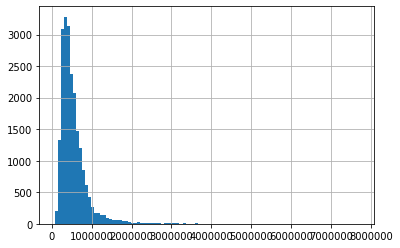

In [5]:
kc.price.hist(bins = 100)

#### Plotando uma dispersão dos dados de preços das casas.

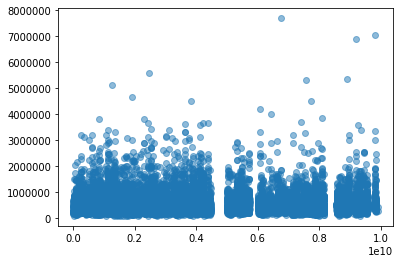

In [6]:
plt.scatter(x = kc.id, y = kc.price, alpha = 0.5)
plt.show()

#### Exercício 2: Quais as 10 casas com a melhor relação custo/benefício do preço por metro quadrado?

#### Plotando uma dispersão dos preços das casas pea área.

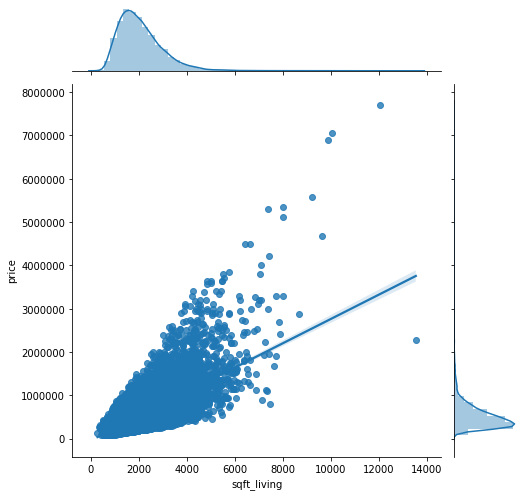

In [7]:
import seaborn as sns

sns.jointplot(x = "sqft_living", 
              y = "price", 
              data = kc, 
              kind = 'reg', 
              fit_reg= True, 
              size = 7)
plt.show()

#### Criando uma coluna de preços por pés quadrados.

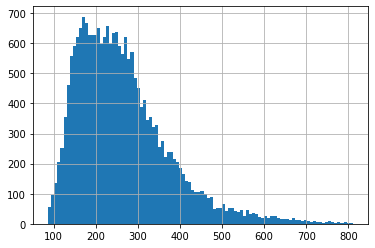

In [8]:
kc['price_per_sqft'] = kc.price / kc.sqft_living
kc['price_per_sqft'].hist(bins = 100)

#### Selecioando os dez valores com menor relação de preço por pé quadrado.

In [9]:
kc['price_per_sqft'].sort_values()[:10]

18262    87.588235
3785     87.647059
13825    87.713311
17197    88.000000
1385     88.028169
6523     88.083700
14993    88.150289
12185    88.541667
8200     88.541667
18590    88.698630
Name: price_per_sqft, dtype: float64

#### A resposta é o índice das casas que estão mostradas no filtro acima: estas são as casas com melhor custo/benefício em relação à sua área.

#### Selecioando as dez casas com menor relação de preço por pé quadrado.

In [10]:
kc['price_per_sqft'].sort_values()[:10].index.values

array([18262,  3785, 13825, 17197,  1385,  6523, 14993, 12185,  8200,
       18590])

#### Exercício 3: Qual a correlação do nível de classificação as casas em relação ao seu preço?

#### contagem dos níveis de classificação das casas.

In [11]:
kc['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

#### Dispersão dos preços das casas pela classificação.

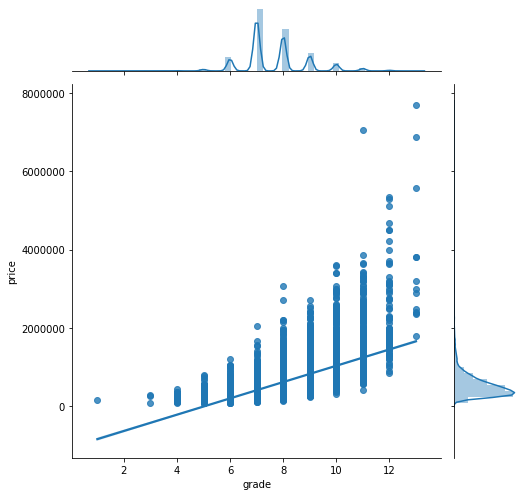

In [12]:
sns.jointplot(x = "grade", y = "price", data = kc, kind = 'reg', fit_reg = True, size = 7)
plt.show()

#### Cálculo da correlação entre os preços das casas e a classificação.

In [13]:
np.corrcoef(x = kc.grade, y = kc.price)

array([[1.        , 0.66743426],
       [0.66743426, 1.        ]])

#### Exercício 4: Podemos afirmar que estar de frente para o lago representa um fator que eleva o preço médio das casas, com uma confiança superior a 95%?

#### Informações básicas do DataFrame.

In [14]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21613 non-null  int64  
 1   date            21613 non-null  object 
 2   price           21613 non-null  float64
 3   bedrooms        21613 non-null  int64  
 4   bathrooms       21613 non-null  float64
 5   sqft_living     21613 non-null  int64  
 6   sqft_lot        21613 non-null  int64  
 7   floors          21613 non-null  float64
 8   waterfront      21613 non-null  int64  
 9   view            21613 non-null  int64  
 10  condition       21613 non-null  int64  
 11  grade           21613 non-null  int64  
 12  sqft_above      21613 non-null  int64  
 13  sqft_basement   21613 non-null  int64  
 14  yr_built        21613 non-null  int64  
 15  yr_renovated    21613 non-null  int64  
 16  zipcode         21613 non-null  int64  
 17  lat             21613 non-null 

#### Contagem do número de casas de frente pra água.

In [15]:
kc.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

#### Cálculo da média e desvio-padrão das casas de frente e não de frente pra água.

In [16]:
import scipy.stats as stats

nwf_mu = kc[kc['waterfront'] == 0]['price'].mean()
nwf_sigma = kc[kc['waterfront'] == 0]['price'].std()

ywf_mu = kc[kc['waterfront'] == 1]['price'].mean()
ywf_sigma = kc[kc['waterfront'] == 1]['price'].std()

#### plotagem das duas curvas normais de distribuição do preço das casas de frente e não de frente pra água.

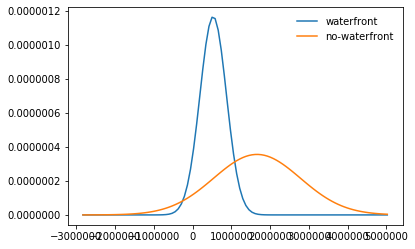

In [17]:
x = np.linspace(nwf_mu - 3*ywf_sigma, ywf_mu + 3*ywf_sigma, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.norm.pdf(x, nwf_mu, nwf_sigma),label='waterfront')
ax.plot(x, stats.norm.pdf(x, ywf_mu, ywf_sigma),label='no-waterfront')
ax.legend(loc = 'best', frameon = False)


#### Intervalo de confiança do preço das casas não de frente pra água.

In [18]:
stats.norm.interval(0.95, loc = nwf_mu, scale = nwf_sigma)

(-137959.29304568272, 1201086.4926727223)

#### Média do preço das casas de frente pra água.

In [19]:
ywf_mu

1661876.0245398772

#### inferência estatístiva da média do preço das casas de frente pra água em comparação com a média do preço das casas não de frente pra água.

In [20]:
stats.norm.interval(0.95, 
                    loc = nwf_mu, 
                    scale = nwf_sigma)[0] < ywf_mu < stats.norm.interval(0.95, 
                                                                         loc = nwf_mu, 
                                                                         scale = nwf_sigma)[1]

False

#### Como a média das casas de frente para a água não está no intervalo de confiança da distribuição normal das casas que não estão de frente para a água, podemos afirmar que estar de frente para a água eleva o preço das casas, com 95% de confiança.